In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import models

Using TensorFlow backend.


In [2]:
from keras.models import load_model
model = load_model('/data/dfc13/DoublePulse/Models/DP_model_NewFormat_Double_Single_Qs2000_400k_NO.h5')
model.summary()

W0303 12:40:40.886559 139934495532800 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0303 12:40:40.907749 139934495532800 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0303 12:40:40.923213 139934495532800 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0303 12:40:40.958899 139934495532800 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 251, 51, 32)       16032     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 125, 25, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 101, 21, 64)       256064    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 10, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 36, 8, 32)         92192     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 4, 32)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
__________

/home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
data_tc = np.load('/fastio2/dasha/double_pulse/data_NuTauCC.npy', mmap_mode='r')
data_tn = np.load('/fastio2/dasha/double_pulse/data_NuTauNC.npy', mmap_mode='r')
data_mc = np.load('/fastio2/dasha/double_pulse/data_NuMuCC.npy', mmap_mode='r')
data_mn = np.load('/fastio2/dasha/double_pulse/data_NuMuNC.npy', mmap_mode='r')
data_ec = np.load('/fastio2/dasha/double_pulse/data_NuECC.npy', mmap_mode='r')
data_en = np.load('/fastio2/dasha/double_pulse/data_NuENC.npy', mmap_mode='r')
data_eg = np.load('/fastio2/dasha/double_pulse/data_NuEGR.npy', mmap_mode='r')

KeyboardInterrupt: 

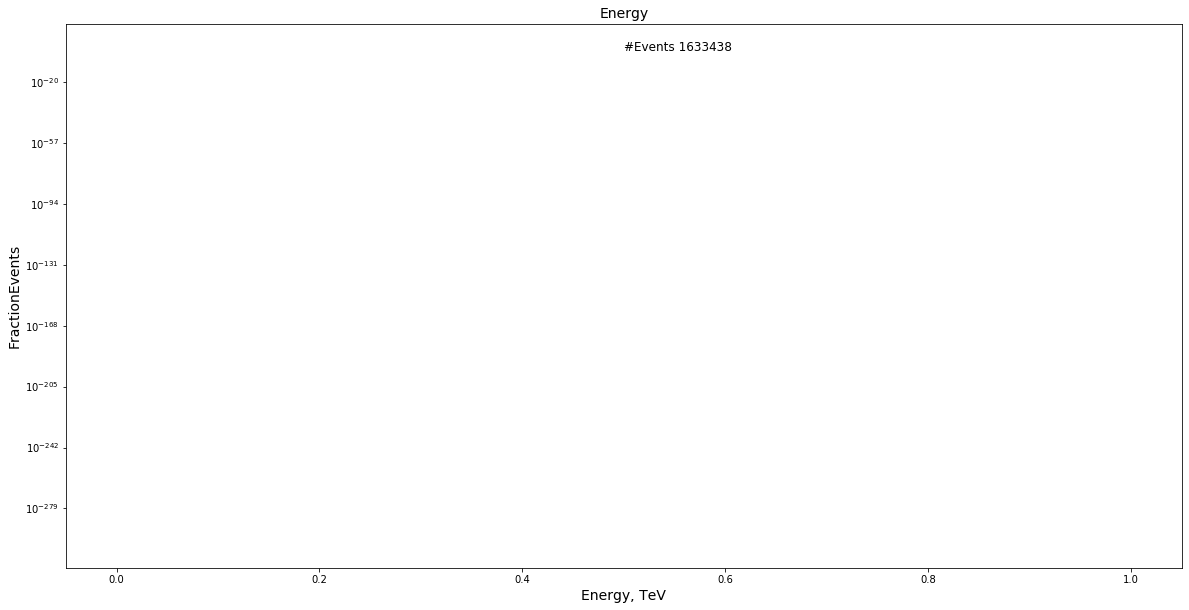

In [4]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, TeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data_ec['neutrino']['energy'], bins =100,  histtype = 'step',edgecolor ='b', lw =1, fill=True, fc=(0, 0, 1, 0.2), range = [0,1000000], label = "Nu")  
plt.show()

In [4]:
mean = 0.0016005471 
std = 0.016772727
print(mean, std)

0.0016005471 0.016772727


In [22]:
preds = []
for im in data_eg['image']:
    #mean = np.mean(im)
    #std = np.std(im)
    im = im.reshape(1,300,60,1)
    im = (im-mean)/std
    pred = model.predict(im)
    preds.append(pred)
preds = np.array(preds)
print(len(preds),preds[0])

50726 [[0.72085905 0.2791409 ]]


In [23]:
preds= preds.reshape(data_eg.shape[0],2)
print(len(preds),preds[0])

50726 [0.72085905 0.2791409 ]


In [24]:
np.save('/fastio2/dasha/double_pulse/preds_NuEGR_Double_Single_Qs2000_400k.npy', preds)

In [25]:
preds = np.load('/fastio2/dasha/double_pulse/preds_NuEGR_Double_Single_Qs2000_400k.npy')
print(preds[0:10])

[[0.72085905 0.2791409 ]
 [0.42754266 0.5724574 ]
 [0.48618    0.51382   ]
 [0.52915466 0.4708454 ]
 [0.06567202 0.934328  ]
 [0.28787458 0.7121254 ]
 [0.2023651  0.7976349 ]
 [0.24999821 0.7500018 ]
 [0.507668   0.492332  ]
 [0.53653806 0.463462  ]]
